# Exploration of Gaussian processes

Multivariate gaussian distribution where the covariance comes from some kernel function.

Output has some mean value which is a function of $x$, and variance which comes from the function covariance.

The output of the gaussian process is a functional form, to make this realisable we find its value at discrete points instead.
The covariance kernel is then computed on those discrete points.

We take the Cholesky decomposition to enable sampling. As such the method doesn't scale well with the data size.

Linear covariance kernal = linear regression?

Explore different kernels

Sklearn approach - cant choice priors?

TFP approach - choice priors


References:
https://www.youtube.com/watch?v=3NMPZou-2kc

In [77]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, DotProduct, ConstantKernel

rng = np.random.RandomState(0)

## Generate linear regression data

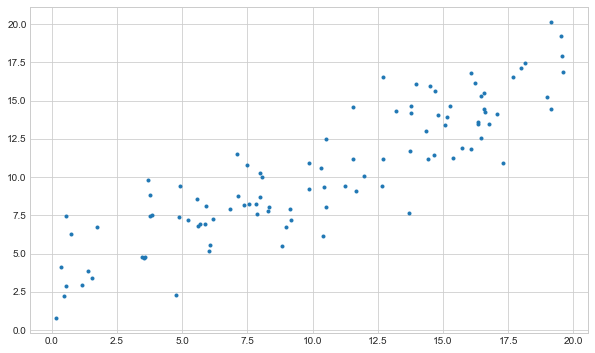

In [42]:
x = np.random.uniform(0, 20, size=(100))
true_data = lambda x: 3 + 0.7*x
y = true_data(x) + np.random.normal(scale=2.0, size=(100))

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, '.')
plt.show()

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, DotProduct, ConstantKernel

# Fit linear regression
lin_reg = LinearRegression()
lin_reg.fit(x[:, np.newaxis], y[:, np.newaxis])

# Fit gaussian process
gp_kernel_linear = DotProduct(sigma_0=0) + ConstantKernel() + WhiteKernel()
gpr_linear = GaussianProcessRegressor(kernel=gp_kernel_linear, normalize_y=True)
gpr_linear.fit(x[:, np.newaxis], y[:, np.newaxis])

GaussianProcessRegressor(kernel=DotProduct(sigma_0=0) + WhiteKernel(noise_level=1))

In [132]:
x_plot = np.linspace(0, 20, 10000)[:, np.newaxis]
y_linear = lin_reg.predict(x_plot)
y_gpr_linear, y_std_linear = gpr_linear.predict(x_plot, return_std=True)

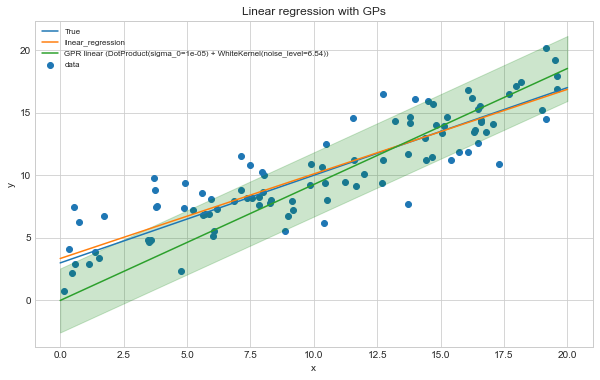

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='data')
plt.plot(x_plot, true_data(x_plot), label='True')

plt.plot(x_plot, y_linear, label='linear_regression')

plt.plot(x_plot, y_gpr_linear, label='GPR linear (%s)' % gpr_linear.kernel_)
plt.fill_between(x_plot[:, 0], y_gpr_linear[:, 0] - y_std_linear, y_gpr_linear[:, 0] + y_std_linear, color='green', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression with GPs')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()

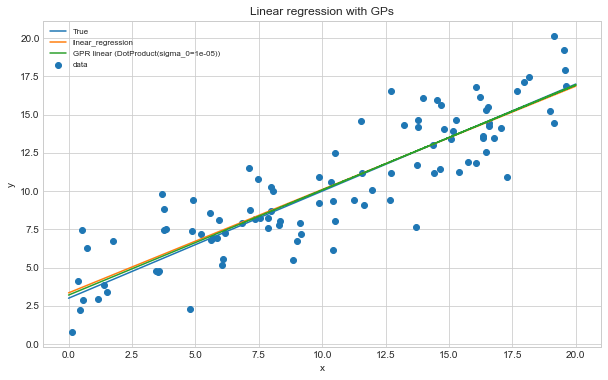

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='data')
plt.plot(x_plot, true_data(x_plot), label='True')

plt.plot(x_plot, y_linear, label='linear_regression')

plt.plot(x_plot, y_gpr_linear, label='GPR linear (%s)' % gpr_linear.kernel_)
# plt.fill_between(x_plot[:, 0], y_gpr_linear[:, 0] - y_std_linear, y_gpr_linear[:, 0] + y_std_linear, color='green', alpha=0.2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear regression with GPs')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()

## Other stuff

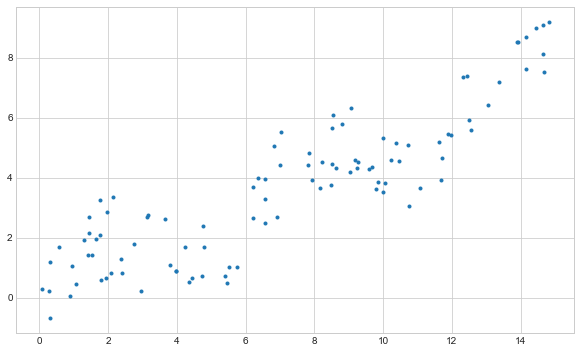

In [2]:
# Generate sample data
x = 15 * rng.rand(100, 1)
y = np.sin(x).ravel()
y += 3 * (0.5 - rng.rand(x.shape[0]))  # add noise

add_grad = True
if add_grad:
    y += 0.5 * x.ravel()  # add gradient

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y, '.')
plt.show()

In [4]:
gp_kernel_linear = DotProduct(sigma_0=1.0)
gpr_linear = GaussianProcessRegressor(kernel=gp_kernel_linear)
stime = time.time()
gpr_linear.fit(x, y)
print("Time for GPR fitting: %.3f" % (time.time() - stime))

Time for GPR fitting: 0.005


In [3]:
gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) \
    + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel)
stime = time.time()
gpr.fit(X, y)
print("Time for GPR fitting: %.3f" % (time.time() - stime))

Time for GPR fitting: 0.042


In [20]:
gp_kernel = ExpSineSquared(length_scale=1.0, periodicity=5.0, periodicity_bounds=(1e-2, 1e1))
gp_kernel += WhiteKernel(1e-1)
gp_kernel += DotProduct(sigma_0=1.0)
gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(x, y)

Time for GPR fitting: 0.294


In [21]:
x_plot = np.linspace(0, 20, 10000)[:, None]

# Predict using gaussian process regressor
stime = time.time()
y_gpr = gpr.predict(x_plot, return_std=False)
print("Time for GPR prediction: %.3f" % (time.time() - stime))

stime = time.time()
y_gpr, y_std = gpr.predict(x_plot, return_std=True)
print("Time for GPR prediction with standard-deviation: %.3f"
      % (time.time() - stime))

stime = time.time()
y_gpr_linear, y_std_linear = gpr_linear.predict(x_plot, return_std=True)
print("Time for GPR linear prediction with standard-deviation: %.3f"
      % (time.time() - stime))

Time for GPR prediction: 0.102
Time for GPR prediction with standard-deviation: 0.054
Time for GPR linear prediction with standard-deviation: 0.012


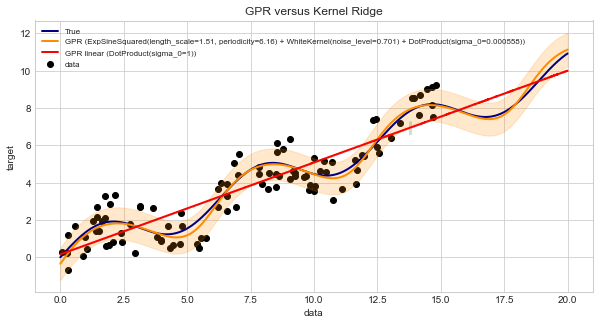

In [23]:
# Plot results
plt.figure(figsize=(10, 5))
lw = 2
plt.scatter(x, y, c='k', label='data')
plt.plot(x_plot, np.sin(x_plot) + 0.5 * x_plot, color='navy', lw=lw, label='True')
plt.plot(x_plot, y_gpr, color='darkorange', lw=lw,
         label='GPR (%s)' % gpr.kernel_)
plt.fill_between(x_plot[:, 0], y_gpr - y_std, y_gpr + y_std, color='darkorange',
                 alpha=0.2)
plt.plot(x_plot, y_gpr_linear, color='red', lw=lw,
         label='GPR linear (%s)' % gpr_linear.kernel_)
plt.fill_between(x_plot[:, 0], y_gpr_linear - y_std_linear, y_gpr_linear + y_std_linear, color='green',
                 alpha=0.2)
plt.xlabel('data')
plt.ylabel('target')
# plt.xlim(0, 20)
# plt.ylim(-4, 4)
plt.title('GPR versus Kernel Ridge')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()

In [28]:
# Plot prior
plt.figure(figsize=(8, 8))
# plt.subplot(2, 1, 1)

y_mean, y_std = gpr.predict(x_plot, return_std=True)
plt.plot(x_plot, y_mean, 'k', lw=3, zorder=9)
plt.fill_between(x_plot.ravel(), y_mean - y_std, y_mean + y_std,
                    alpha=0.2, color='k')
y_samples = gpr.sample_y(x_plot, 10)
plt.plot(x_plot, y_samples, lw=1)
plt.xlim(0, 5)
plt.ylim(-3, 3)
# plt.title("Prior (kernel:  %s)" % kernel, fontsize=12)
